# Feature Importance Analysis

This notebook performs feature importance analysis using different models including:

- **Random Forest Classifier**
- **Support Vector Classifier (SVC)**
- **Logistic Regression**

It also uses hyperparameter tuning with `RandomizedSearchCV` for model optimization. Feature importance is visualized to interpret the influence of different features on model predictions.

## Importing Libraries

The necessary libraries for data manipulation, visualization, and machine learning are imported here. Key libraries include:

- `numpy`: For numerical operations
- `matplotlib` and `seaborn`: For data visualization
- `sklearn`: For machine learning algorithms, model evaluation, and hyperparameter tuning

In [1]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (accuracy_score, classification_report, 
                            confusion_matrix)
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint
from sklearn.model_selection import KFold

## Loading Processed Data

The processed datasets for training and testing are loaded using `numpy`. This includes separate datasets for classification and regression tasks. Additionally, scaled versions of the datasets are loaded for models that require normalized data.

In [2]:
X_test_top = np.load('../data/processed/X_test_top.npy')
X_train_top = np.load('../data/processed/X_train_top.npy')
y_class_train = np.load('../data/processed/y_class_train.npy')
y_class_test = np.load('../data/processed/y_class_test.npy')
y_reg_train = np.load('../data/processed/y_reg_train.npy')
y_reg_test = np.load('../data/processed/y_reg_test.npy')
X_test_top_scaled = np.load('../data/processed/X_test_top_scaled.npy')
X_train_top_scaled = np.load('../data/processed/X_train_top_scaled.npy')

## Random Forest Classifier with Hyperparameter Tuning

A `RandomForestClassifier` is used to evaluate feature importance. Hyperparameter tuning is performed using `RandomizedSearchCV` for faster and more efficient search compared to `GridSearchCV`. The best parameters are selected using cross-validation with `StratifiedKFold` to ensure robust evaluation.

In [14]:
rf_clf = RandomForestClassifier(random_state=42)
rf_param_dist = {
    'n_estimators': (50, 152),
    'max_depth': [None],
    'min_samples_split': [2],
    'class_weight': [None]
}

# Randomized Search (tried grid search but compuntationally too intensive)
rf_random_search = RandomizedSearchCV(
    rf_clf,
    param_distributions=rf_param_dist,
    n_iter=10,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

rf_random_search.fit(X_train_top, y_class_train)


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'class_weight': [None],
                                        'max_depth': [None],
                                        'min_samples_split': [2],
                                        'n_estimators': (50, 152)},
                   random_state=42, scoring='f1')


=== Random Forest ===
Best Parameters: {'n_estimators': 152, 'min_samples_split': 2, 'max_depth': 10, 'class_weight': None}
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      6188
         1.0       0.91      0.82      0.86      6015

    accuracy                           0.87     12203
   macro avg       0.87      0.87      0.87     12203
weighted avg       0.87      0.87      0.87     12203

Accuracy: 0.8694


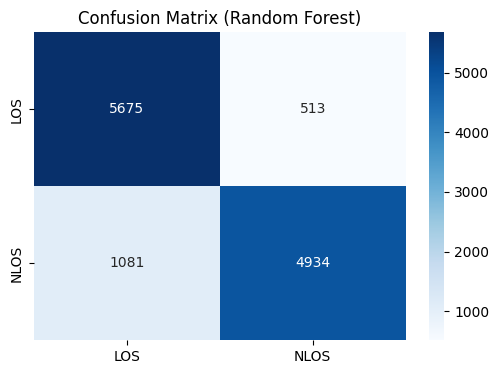

In [11]:
# Random Forest Classification Model & Evaluation
best_rf = rf_random_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_top)

print("\n=== Random Forest ===")
print(f"Best Parameters: {rf_random_search.best_params_}")
print(classification_report(y_class_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_class_test, y_pred_rf):.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_class_test, y_pred_rf), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['LOS', 'NLOS'], 
            yticklabels=['LOS', 'NLOS'])
plt.title('Confusion Matrix (Random Forest)')
plt.show()

updated features set

In [12]:
rf_clf = RandomForestClassifier(random_state=42)
rf_param_dist = {
    'n_estimators': (50 ,152),
    'max_depth': [None],
    'min_samples_split': [2],
    'class_weight': [None]
}

# Randomized Search (tried grid search but compuntationally too intensive)
rf_random_search = RandomizedSearchCV(
    rf_clf,
    param_distributions=rf_param_dist,
    n_iter=10,  
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

rf_random_search.fit(X_train_top_scaled, y_class_train)


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'class_weight': [None],
                                        'max_depth': [None],
                                        'min_samples_split': [2],
                                        'n_estimators': (50, 152)},
                   random_state=42, scoring='f1')


=== Random Forest ===
Best Parameters: {'n_estimators': 152, 'min_samples_split': 2, 'max_depth': None, 'class_weight': None}
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      6188
         1.0       0.89      0.81      0.84      6015

    accuracy                           0.85     12203
   macro avg       0.86      0.85      0.85     12203
weighted avg       0.86      0.85      0.85     12203

Accuracy: 0.8528


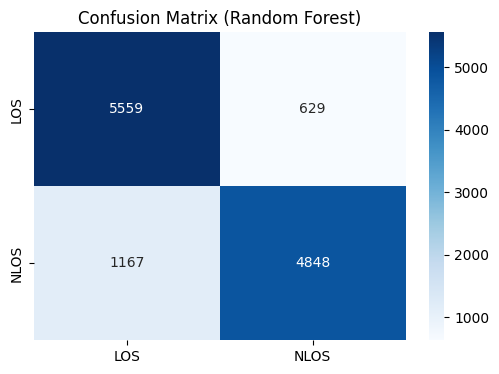

In [13]:
# Random Forest Classification Model & Evaluation
best_rf = rf_random_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_top_scaled)

print("\n=== Random Forest ===")
print(f"Best Parameters: {rf_random_search.best_params_}")
print(classification_report(y_class_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_class_test, y_pred_rf):.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_class_test, y_pred_rf), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['LOS', 'NLOS'], 
            yticklabels=['LOS', 'NLOS'])
plt.title('Confusion Matrix (Random Forest)')
plt.show()

__Comparison of Model Performance (Random Forest Regressor)__

initial features set

In [15]:
rf_reg = RandomForestRegressor(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 150, 200],  # Reduced range
    'max_depth': [None, 10, 20],      # Reasonable depths
    'min_samples_split': [2, 5],      # Common values
    'max_features': ['sqrt', 'log2']  # Feature selection
}

rf_random_search = RandomizedSearchCV(
    rf_reg,
    rf_param_grid,
    n_iter=10,  # Try 10 random combinations
    cv=KFold(n_splits=3, shuffle=True, random_state=42),  # Fewer folds for speed
    scoring='neg_mean_squared_error',  # Use MSE for regression
    n_jobs=-1,
    random_state=42
)
rf_random_search.fit(X_train_top_scaled, y_reg_train)

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 150, 200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [16]:
# Random Forest Regressor Model & Evaluation
best_rf_reg = rf_random_search.best_estimator_
y_pred_rf = best_rf_reg.predict(X_test_top_scaled)

print("\n=== Random Forest Regressor ===")
print(f"Best Parameters: {rf_random_search.best_params_}")
print(f"Mean Squared Error: {mean_squared_error(y_reg_test, y_pred_rf):.4f}")
print(f"R2 Score: {r2_score(y_reg_test, y_pred_rf):.4f}")


=== Random Forest Regressor ===
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'log2', 'max_depth': 20}
Mean Squared Error: 2.6203
R2 Score: 0.5279


updated featuresd set

In [19]:
rf_reg = RandomForestRegressor(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 150, 200],  # Reduced range
    'max_depth': [None, 10, 20],      # Reasonable depths
    'min_samples_split': [2, 5],      # Common values
    'max_features': ['sqrt', 'log2']  # Feature selection
}

rf_random_search = RandomizedSearchCV(
    rf_reg,
    rf_param_grid,
    n_iter=10,  # Try 10 random combinations
    cv=KFold(n_splits=3, shuffle=True, random_state=42),  # Fewer folds for speed
    scoring='neg_mean_squared_error',  # Use MSE for regression
    n_jobs=-1,
    random_state=42
)
rf_random_search.fit(X_train_top, y_reg_train)

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 150, 200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [20]:
# Random Forest Regressor Model & Evaluation
best_rf_reg = rf_random_search.best_estimator_
y_pred_rf = best_rf_reg.predict(X_test_top)

print("\n=== Random Forest Regressor ===")
print(f"Best Parameters: {rf_random_search.best_params_}")
print(f"Mean Squared Error: {mean_squared_error(y_reg_test, y_pred_rf):.4f}")
print(f"R2 Score: {r2_score(y_reg_test, y_pred_rf):.4f}")


=== Random Forest Regressor ===
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'log2', 'max_depth': 20}
Mean Squared Error: 1.9369
R2 Score: 0.6510
